<a href="https://colab.research.google.com/github/siddhant8019/stock_market-Prediction/blob/main/StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import tensorflow as tf
from datetime import date
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [42]:
start = dt.datetime(2018,4,1)
end = dt.datetime(2024,4,30)
stk_data = yf.download('GOOGL',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [43]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,51.381001,51.976501,49.712502,50.631500,50.631500,65068000
2018-04-03,50.807499,51.250000,49.862499,50.933998,50.933998,51322000
2018-04-04,49.911499,51.637001,49.825500,51.485500,51.485500,50724000
2018-04-05,52.319500,52.335499,51.200001,51.632000,51.632000,35836000
2018-04-06,51.154999,51.799999,50.312500,50.497501,50.497501,40134000
...,...,...,...,...,...,...
2024-04-23,156.960007,158.970001,156.279999,158.259995,158.259995,21151600
2024-04-24,157.490005,159.570007,157.169998,159.130005,159.130005,22779100
2024-04-25,151.330002,156.490005,150.869995,156.000000,156.000000,57109700


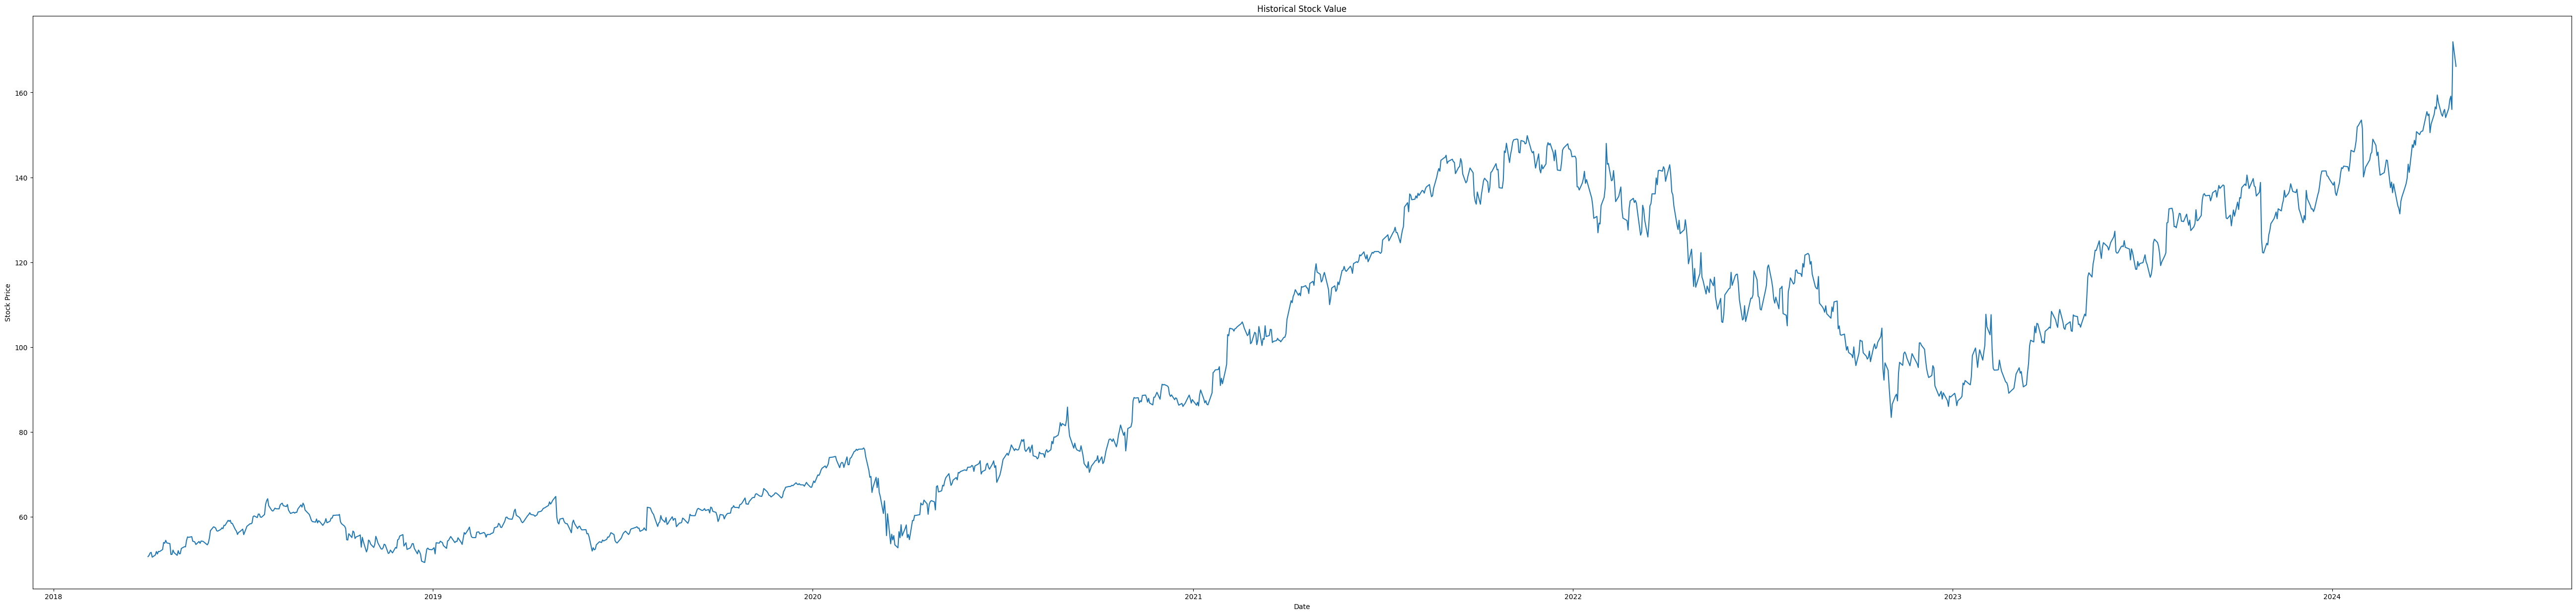

In [44]:
plt.figure(figsize=(66,15))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [45]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [46]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1509):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [47]:
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm_model.add(tf.keras.layers.Dropout(0.2))
lstm_model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
lstm_model.add(tf.keras.layers.Dropout(0.2))
lstm_model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
lstm_model.add(tf.keras.layers.Dropout(0.2))
lstm_model.add(tf.keras.layers.LSTM(units = 50))
lstm_model.add(tf.keras.layers.Dropout(0.2))
lstm_model.add(tf.keras.layers.Dense(units = 1))


In [48]:
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm_model.fit(X_train, y_train, epochs = 225, batch_size = 32)

Epoch 1/225
46/46 [==============================] - 14s 120ms/step - loss: 0.0187
Epoch 2/225
46/46 [==============================] - 11s 247ms/step - loss: 0.0052
Epoch 3/225
46/46 [==============================] - 9s 190ms/step - loss: 0.0042
Epoch 4/225
46/46 [==============================] - 7s 155ms/step - loss: 0.0038
Epoch 5/225
46/46 [==============================] - 6s 137ms/step - loss: 0.0037
Epoch 6/225
46/46 [==============================] - 8s 176ms/step - loss: 0.0039
Epoch 7/225
46/46 [==============================] - 5s 112ms/step - loss: 0.0034
Epoch 8/225
46/46 [==============================] - 6s 137ms/step - loss: 0.0033
Epoch 9/225
46/46 [==============================] - 5s 109ms/step - loss: 0.0033
Epoch 10/225
46/46 [==============================] - 7s 154ms/step - loss: 0.0031
Epoch 11/225
46/46 [==============================] - 5s 109ms/step - loss: 0.0032
Epoch 12/225
46/46 [==============================] - 6s 129ms/step - loss: 0.0031
Epoch 13/22

In [24]:
testframe_data = yf.download('GOOGL', start=dt.datetime(2024,3,3), end=dt.datetime(2024,5,15))
testframe_data['Date'] = testframe_data.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testframe_data['Date']
testdata['Open'] = testframe_data['Open']
testdata['High'] = testframe_data['High']
testdata['Low'] = testframe_data['Low']
testdata['Close'] = testframe_data['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 235):
  if i < len(inputs):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


[*********************100%%**********************]  1 of 1 completed


In [25]:
predicted_stock_price = lstm_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 0s 27ms/step


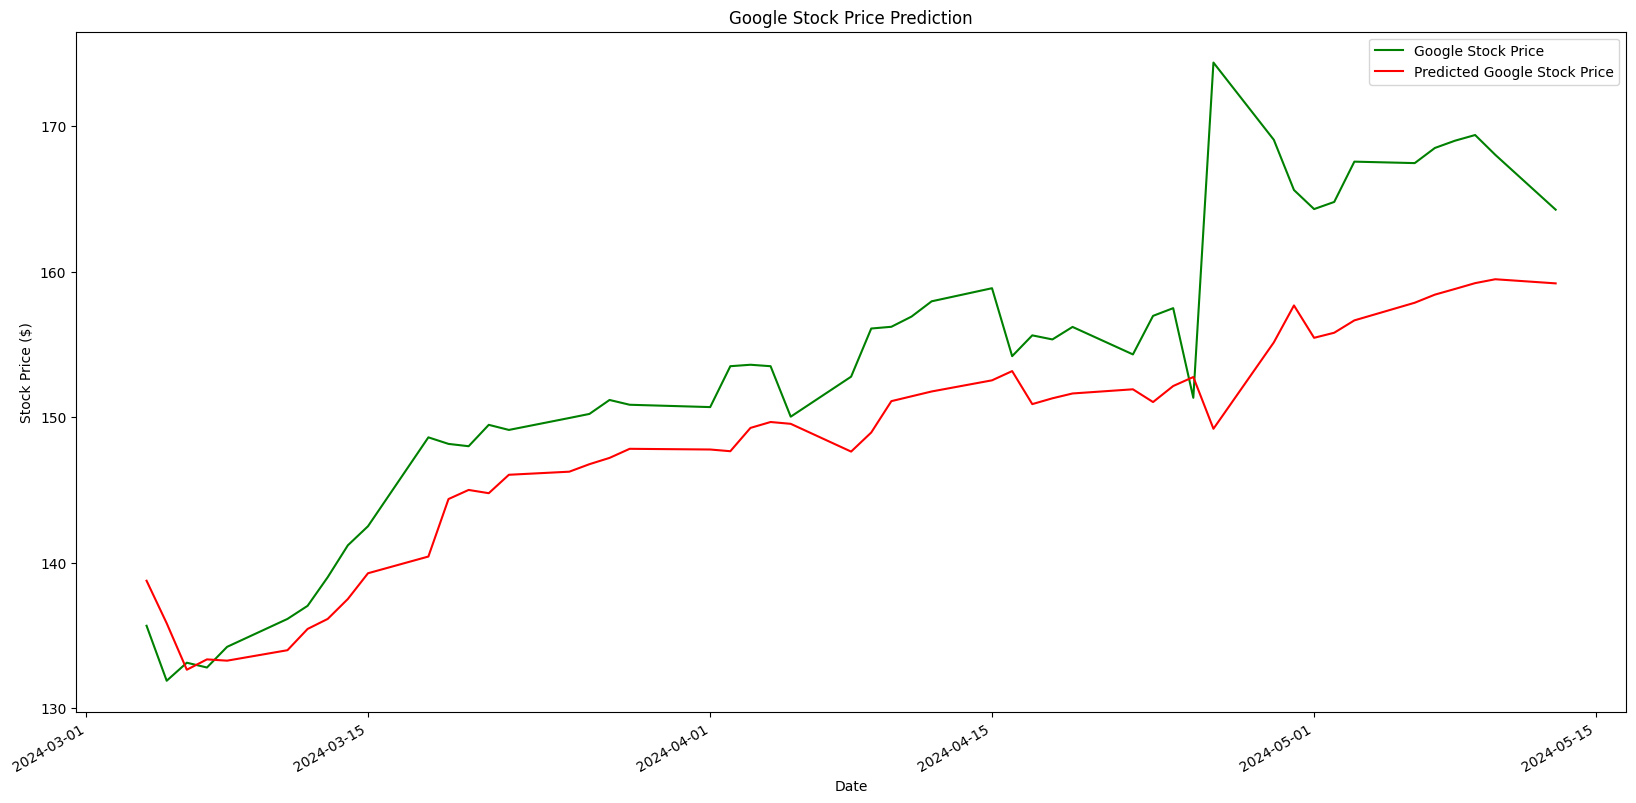

In [36]:
testdata['Date'] = pd.to_datetime(testdata['Date'])
dates = testdata['Date'].values
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(dates, real_stock_price, color='green', label='Google Stock Price')
ax.plot(dates, predicted_stock_price, color='red', label='Predicted Google Stock Price')

ax.set_title('Google Stock Price Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price ($)')

fig.autofmt_xdate()
ax.legend()

plt.show()